In [1]:
# Importing Libraries
import numpy as np 
import pandas as pd 

In [2]:
#loadind dataset
df = pd.read_csv('train.csv')
df.head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...


<AxesSubplot:>

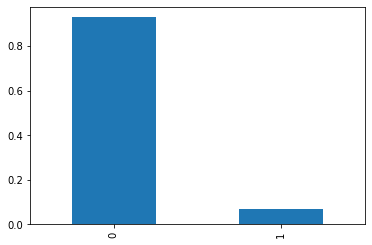

In [3]:
#plot of label distribution
df['label'].value_counts(normalize = True).plot.bar()

In [4]:
#creating a copy of 2242 non-racist tweets to balance it with the total number of available racist tweets.
dfnr = df[df["label"] == 0][:2242]
dfnr

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
2404,2405,0,found my future husband on the plane to marbs ...
2405,2406,0,", excited, clapping, unbreakable kimmy schmid..."
2406,2407,0,not long until the england v wales match! the ...
2407,2408,0,nude rear naughty naked school girls


In [5]:
#creating a copy racist tweets
dfr = df[df["label"] == 1]
dfr

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'buil...
14,15,1,no comment! in #australia #opkillingbay #se...
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'...
...,...,...,...
31934,31935,1,lady banned from kentucky mall. @user #jcpenn...
31946,31947,1,@user omfg i'm offended! i'm a mailbox and i'...
31947,31948,1,@user @user you don't have the balls to hashta...
31948,31949,1,"makes you ask yourself, who am i? then am i a..."


In [6]:
#Adding the two dataframes together
frames = [dfnr, dfr]
df = pd.concat(frames)

In [7]:
df.reset_index(drop=True,inplace=True)

In [8]:
df

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
4479,31935,1,lady banned from kentucky mall. @user #jcpenn...
4480,31947,1,@user omfg i'm offended! i'm a mailbox and i'...
4481,31948,1,@user @user you don't have the balls to hashta...
4482,31949,1,"makes you ask yourself, who am i? then am i a..."


In [9]:
#Importing libraries for data cleaning
import re
import nltk
from nltk.corpus import stopwords

In [10]:
def clean_tweet_words(tweet):
    alpha_only = re.sub("[^a-zA-Z]",' ',tweet) #"[^a-zA-Z]" this regex will remove any non-alphabetical char as they are not significant
    words = alpha_only.lower().split()
    stop = set(stopwords.words('english'))
    #from the dataframe we can see 'user' word is quite common in the tweets, which is basically used for tagging someone in the tweet
    #so I will be removing that
    stop.add('user')
    sig_words = [word for word in words if not word in stop]
    return(" ".join(sig_words))

In [11]:
df

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
4479,31935,1,lady banned from kentucky mall. @user #jcpenn...
4480,31947,1,@user omfg i'm offended! i'm a mailbox and i'...
4481,31948,1,@user @user you don't have the balls to hashta...
4482,31949,1,"makes you ask yourself, who am i? then am i a..."


In [12]:
# creating a clean_tweet column and adding it to the dataframe
df['clean_tweet']  = df['tweet'].apply(lambda tweet: clean_tweet_words(tweet))

df

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,father dysfunctional selfish drags kids dysfun...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks lyft credit use cause offer wheelchair ...
2,3,0,bihday your majesty,bihday majesty
3,4,0,#model i love u take with u all the time in ...,model love u take u time ur
4,5,0,factsguide: society now #motivation,factsguide society motivation
...,...,...,...,...
4479,31935,1,lady banned from kentucky mall. @user #jcpenn...,lady banned kentucky mall jcpenny kentucky
4480,31947,1,@user omfg i'm offended! i'm a mailbox and i'...,omfg offended mailbox proud mailboxpride liber...
4481,31948,1,@user @user you don't have the balls to hashta...,balls hashtag say weasel away lumpy tony dipshit
4482,31949,1,"makes you ask yourself, who am i? then am i a...",makes ask anybody god oh thank god


In [13]:
#drop tweet and id columns
df.drop(['tweet',"id"],axis=1,inplace=True)

In [14]:
df

,label,clean_tweet
0,0,father dysfunctional selfish drags kids dysfun...
1,0,thanks lyft credit use cause offer wheelchair ...
2,0,bihday majesty
3,0,model love u take u time ur
4,0,factsguide society motivation
...,...,...
4479,1,lady banned kentucky mall jcpenny kentucky
4480,1,omfg offended mailbox proud mailboxpride liber...
4481,1,balls hashtag say weasel away lumpy tony dipshit
4482,1,makes ask anybody god oh thank god


In [15]:
df['clean_tweet']

0       father dysfunctional selfish drags kids dysfun...
1       thanks lyft credit use cause offer wheelchair ...
2                                          bihday majesty
3                             model love u take u time ur
4                           factsguide society motivation
                              ...                        
4479           lady banned kentucky mall jcpenny kentucky
4480    omfg offended mailbox proud mailboxpride liber...
4481     balls hashtag say weasel away lumpy tony dipshit
4482                   makes ask anybody god oh thank god
4483      sikh temple vandalised calgary wso condemns act
Name: clean_tweet, Length: 4484, dtype: object

In [16]:
# creating sentiment scores
from nltk.sentiment import SentimentIntensityAnalyzer as VS
sentiment_analyzer = VS()
def other_features(tweet):
    sentiment = sentiment_analyzer.polarity_scores(tweet)
    features = [sentiment['neg'], sentiment['pos'], sentiment['neu'], sentiment['compound']]
    features = pd.DataFrame(features)
    return features

In [17]:
def get_feature_array(tweets):
    feats=[]
    for t in tweets:
        feats.append(other_features(t))
    return np.array(feats)

In [18]:
feats = get_feature_array(df['clean_tweet'])

In [19]:
len(feats)

4484

In [20]:
feats = feats.reshape(4484,4)


In [21]:
len(feats)

4484

In [22]:
feats

array([[ 0.655 ,  0.    ,  0.345 , -0.765 ],
       [ 0.    ,  0.379 ,  0.621 ,  0.6705],
       [ 0.    ,  0.    ,  1.    ,  0.    ],
       ...,
       [ 0.307 ,  0.    ,  0.693 , -0.4767],
       [ 0.    ,  0.626 ,  0.374 ,  0.6908],
       [ 0.355 ,  0.    ,  0.645 , -0.5106]])

In [23]:
feats = pd.DataFrame(feats,columns=["Negative","Positive","Neutral","Compound"])

In [24]:
feats

,Negative,Positive,Neutral,Compound
0,0.655,0.000,0.345,-0.7650
1,0.000,0.379,0.621,0.6705
2,0.000,0.000,1.000,0.0000
3,0.000,0.512,0.488,0.6369
4,0.000,0.545,0.455,0.3400
...,...,...,...,...
4479,0.375,0.000,0.625,-0.4588
4480,0.220,0.341,0.440,0.2732
4481,0.307,0.000,0.693,-0.4767
4482,0.000,0.626,0.374,0.6908


In [25]:
df = pd.concat([df,feats],axis=1)

In [26]:
df

,label,clean_tweet,Negative,Positive,Neutral,Compound
0,0,father dysfunctional selfish drags kids dysfun...,0.655,0.000,0.345,-0.7650
1,0,thanks lyft credit use cause offer wheelchair ...,0.000,0.379,0.621,0.6705
2,0,bihday majesty,0.000,0.000,1.000,0.0000
3,0,model love u take u time ur,0.000,0.512,0.488,0.6369
4,0,factsguide society motivation,0.000,0.545,0.455,0.3400
...,...,...,...,...,...,...
4479,1,lady banned kentucky mall jcpenny kentucky,0.375,0.000,0.625,-0.4588
4480,1,omfg offended mailbox proud mailboxpride liber...,0.220,0.341,0.440,0.2732
4481,1,balls hashtag say weasel away lumpy tony dipshit,0.307,0.000,0.693,-0.4767
4482,1,makes ask anybody god oh thank god,0.000,0.626,0.374,0.6908


In [27]:
df[df['label']==0]

,label,clean_tweet,Negative,Positive,Neutral,Compound
0,0,father dysfunctional selfish drags kids dysfun...,0.655,0.000,0.345,-0.7650
1,0,thanks lyft credit use cause offer wheelchair ...,0.000,0.379,0.621,0.6705
2,0,bihday majesty,0.000,0.000,1.000,0.0000
3,0,model love u take u time ur,0.000,0.512,0.488,0.6369
4,0,factsguide society motivation,0.000,0.545,0.455,0.3400
...,...,...,...,...,...,...
2237,0,found future husband plane marbs never gonna s...,0.000,0.000,1.000,0.0000
2238,0,excited clapping unbreakable kimmy schmidt kim...,0.000,0.211,0.789,0.3400
2239,0,long england v wales match team fish getting s...,0.000,0.159,0.841,0.1779
2240,0,nude rear naughty naked school girls,0.000,0.000,1.000,0.0000


In [29]:
#importing tfidfvectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(
   
    ngram_range=(1, 4),
   
    use_idf=True,
    smooth_idf=False,
    norm=None,
    decode_error='replace',
    max_features=10000,
    min_df=5,
    max_df=0.75
    )

In [30]:
stopwords = nltk.corpus.stopwords.words('english')

In [31]:

tfidf = vectorizer.fit_transform(df['clean_tweet']).toarray()

In [32]:
tfidf.shape

(4484, 1865)

In [33]:
feats

,Negative,Positive,Neutral,Compound
0,0.655,0.000,0.345,-0.7650
1,0.000,0.379,0.621,0.6705
2,0.000,0.000,1.000,0.0000
3,0.000,0.512,0.488,0.6369
4,0.000,0.545,0.455,0.3400
...,...,...,...,...
4479,0.375,0.000,0.625,-0.4588
4480,0.220,0.341,0.440,0.2732
4481,0.307,0.000,0.693,-0.4767
4482,0.000,0.626,0.374,0.6908


In [34]:
#Now join them all up
M = np.concatenate([feats,tfidf],axis=1)

In [35]:
X = pd.DataFrame(M)
y = df['label'].astype(int)

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
from sklearn.ensemble import ExtraTreesClassifier
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier

In [39]:
model1 = list()
model1.append(('svm', LinearSVC()))
model1.append(('lr', LogisticRegression()))



# define meta learner model
level1 = LogisticRegression()
# define the stacking ensemble
clf1 = StackingClassifier(estimators=model1, final_estimator=level1,cv=5)
# fit the model on all available data
clf1.fit(X_train, y_train)
# make a prediction for one example

pred = clf1.predict(X_test)

C:\Users\Nelson\anaconda3\envs\tensor\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Nelson\anaconda3\envs\tensor\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Nelson\anaconda3\envs\tensor\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Nelson\anaconda3\envs\tensor\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Nelson\anaconda3\envs\tensor\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning

In [40]:
from sklearn.metrics import classification_report
report = classification_report(y_test, pred )
print(report)

              precision    recall  f1-score   support

           0       0.82      0.87      0.85       443
           1       0.87      0.82      0.84       454

    accuracy                           0.84       897
   macro avg       0.84      0.84      0.84       897
weighted avg       0.85      0.84      0.84       897



In [42]:
model2 = list()
model2.append(('mnb', GaussianNB()))
model2.append(('etc', ExtraTreesClassifier()))
clf2 = StackingClassifier(estimators=model2, final_estimator= LogisticRegression(),cv=5)
# fit the model on all available data
clf2.fit(X_train, y_train)
# make a prediction for one example
pred2 = clf2.predict(X_test)
from sklearn.metrics import classification_report
report = classification_report(y_test, pred2 )
print(report)

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       443
           1       0.86      0.85      0.85       454

    accuracy                           0.85       897
   macro avg       0.85      0.85      0.85       897
weighted avg       0.85      0.85      0.85       897



In [43]:
model3 = list()
model3.append(('xgb', xgb.XGBClassifier()))
model3.append(('adb',RandomForestClassifier()))


clf3 = StackingClassifier(estimators=model3, final_estimator= LogisticRegression(),cv=5)
# fit the model on all available data
clf3.fit(X_train, y_train)
# make a prediction for one example
pred3 = clf3.predict(X_test)
from sklearn.metrics import classification_report
report = classification_report(y_test, pred3 )
print(report)

C:\Users\Nelson\anaconda3\envs\tensor\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:46:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nelson\anaconda3\envs\tensor\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:48:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nelson\anaconda3\envs\tensor\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:49:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nelson\anaconda3\envs\tensor\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:49:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nelson\anaconda3\envs\tensor\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:50:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Nelson\anaconda3\envs\tensor\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:51:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.81      0.84      0.82       443
           1       0.83      0.81      0.82       454

    accuracy                           0.82       897
   macro avg       0.82      0.82      0.82       897
weighted avg       0.82      0.82      0.82       897



In [44]:
from sklearn.neighbors import NearestCentroid
model4 = list()
model4.append(("nc",lgb.LGBMClassifier()))
model4.append(("adb",AdaBoostClassifier()))


clf4 = StackingClassifier(estimators=model4, final_estimator= LogisticRegression(),cv=5)
# fit the model on all available data
clf4.fit(X_train, y_train)
# make a prediction for one example
pred4 = clf4.predict(X_test)
from sklearn.metrics import classification_report
report = classification_report(y_test, pred4 )
print(report)

              precision    recall  f1-score   support

           0       0.76      0.82      0.79       443
           1       0.81      0.75      0.78       454

    accuracy                           0.79       897
   macro avg       0.79      0.79      0.79       897
weighted avg       0.79      0.79      0.79       897



In [45]:
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegressionCV
model5 = list()
model5.append(('sgd', SGDClassifier()))
model5.append(('lrcv', LogisticRegressionCV()))


clf5 = StackingClassifier(estimators=model5, final_estimator= LogisticRegression(),cv=5)
# fit the model on all available data
clf5.fit(X_train, y_train)
# make a prediction for one example
pred5 = clf5.predict(X_test)
from sklearn.metrics import classification_report
report = classification_report(y_test, pred5 )
print(report)

C:\Users\Nelson\anaconda3\envs\tensor\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Nelson\anaconda3\envs\tensor\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

C:\Users\Nelson\anaconda3\envs\tensor\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Nelson\anaconda3\envs\tensor\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

C:\Users\Nelson\anaconda3\envs\tensor\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Nelson\anaconda3\envs\tensor\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

C:\Users\Nelson\anaconda3\envs\tensor\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Nelson\anaconda3\envs\tensor\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

C:\Users\Nelson\anaconda3\envs\tensor\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Nelson\anaconda3\envs\tensor\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

C:\Users\Nelson\anaconda3\envs\tensor\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Nelson\anaconda3\envs\tensor\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

C:\Users\Nelson\anaconda3\envs\tensor\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Nelson\anaconda3\envs\tensor\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

C:\Users\Nelson\anaconda3\envs\tensor\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Nelson\anaconda3\envs\tensor\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

              precision    recall  f1-score   support

           0       0.86      0.87      0.87       443
           1       0.87      0.86      0.87       454

    accuracy                           0.87       897
   macro avg       0.87      0.87      0.87       897
weighted avg       0.87      0.87      0.87       897

